In [4]:
import numpy as np
import pandas as pd

* 데이터 불러오기

In [ ]:
df = pd.read_csv('C:/SOOKTAT/0. 프로젝트/Taxi/data/train.csv')

In [3]:
df.head(5)  #longitude(경도, y), latitude(위도, x)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
len(df)

55423856

In [5]:
df.passenger_count.value_counts()  ## 0인 값은 지워야 할까...?

1      38337524
2       8175243
5       3929346
3       2432712
4       1178852
6       1174647
0        195416
208          64
9            23
7            15
8             9
129           2
34            1
49            1
51            1
Name: passenger_count, dtype: int64

In [45]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


* test.csv 확인하기

In [10]:
test = pd.read_csv('C:/SOOKTAT/0. 프로젝트/Taxi/data/test.csv')
test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [11]:
test.passenger_count.unique()  ## df에서 passenger_count=0인 레코드 제거

array([1, 2, 3, 4, 5, 6], dtype=int64)

* 결측치 제거

In [ ]:
df1 = df.dropna(axis=0)
len(df1)

In [ ]:
df1.passenger_count.value_counts()

* passenger_count = 0인 레코드 제거

In [ ]:
df1 = df1[df1['passenger_count']!=0]
df1.passenger_count.value_counts()

* 뉴욕 택시 특징

In [ ]:
# 기본요금은 $2.50에 총 $0.80의 추가 요금
# 5분의 1마일당, 혹은 교통 체증 시 60초당 $0.50이 가산
# 택시에 4명까지 탈 수 O
# 20:00부터 06:00까지 $0.50를 추가로 지불
# 월요일부터 금요일 16:00~20:00까지 교통체증이 있는 시간대에도 $1의 할증

In [ ]:
## 승객들이 4명 단위로 나눠져서 택시 탑승 (1~4명은 한 팀, 5~6명은 두 팀으로 나눠짐)
## & 뒤에 산점도 확인하면 passenger_account는 fare_amount와 무관
## -> 'taxi_account', 'fare_amount_ontaxi' 추가 변수 생성
##    (taxi_account ; 택시 개수, fare_amount_ontaxi ; 택시 당 운행 요금 (= fare_amount / taxi_account))

In [ ]:
## or 택시 하나에 6명이 다 타는거라면? passenger_account는 의미 X
## fare_amount = 택시 하나에서 발생하는 운행 요금

In [ ]:
## -> 'add_fare_amount' 추가 변수 생성 (추가 지불액이 발생하는 시간대인지 확인 후 할증액 추가) 

* 2500개만 랜덤 추출

In [ ]:
sample = df1.sample(n=2500)
sample.head(5)

In [51]:
len(sample)

2500

In [52]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 16050459 to 51270735
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2500 non-null   object 
 1   fare_amount        2500 non-null   float64
 2   pickup_datetime    2500 non-null   object 
 3   pickup_longitude   2500 non-null   float64
 4   pickup_latitude    2500 non-null   float64
 5   dropoff_longitude  2500 non-null   float64
 6   dropoff_latitude   2500 non-null   float64
 7   passenger_count    2500 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 175.8+ KB


* 통계량 살펴보기

In [53]:
sample.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,11.209404,-72.716679,40.036961,-72.745598,40.053292,1.696800
std,9.020841,9.667847,5.657044,9.557636,5.600136,1.308111
min,2.500000,-74.185047,-73.965647,-74.192142,-73.972127,1.000000
25%,6.000000,-73.992197,40.736146,-73.991590,40.734048,1.000000
50%,8.500000,-73.982118,40.753059,-73.980370,40.752544,1.000000
75%,12.900000,-73.966898,40.768019,-73.963772,40.767616,2.000000
max,80.750000,40.768367,40.845333,40.756965,40.959270,6.000000


* 변수마다 산점도/히스토그램 그려보기

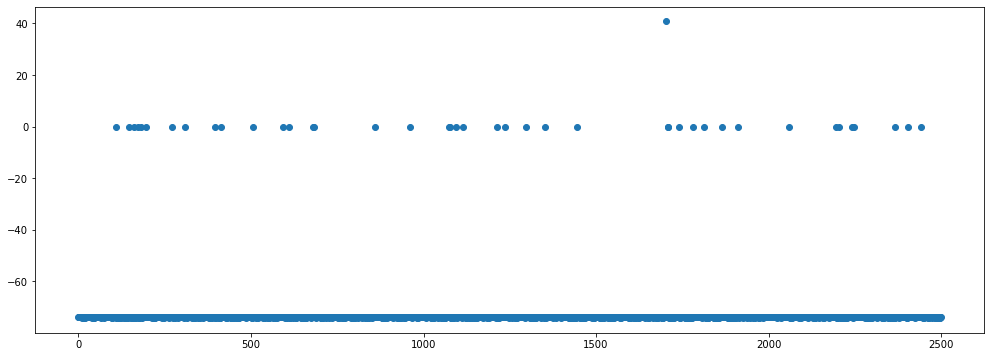

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17,6))
plt.scatter(range(len(sample)), sample['pickup_longitude'])
plt.show()  ## 경도 0도 = 본초 자오선 -> 영국 통과

In [67]:
sample = sample[sample.pickup_longitude < 0]

sample.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000
mean,11.221107,-73.975779,40.751166,-73.914880,40.718057,1.695688
std,9.056082,0.033646,0.026107,2.109972,1.162589,1.308122
min,2.500000,-74.185047,40.608384,-74.192142,0.000000,1.000000
25%,6.000000,-73.992467,40.737596,-73.991777,40.735034,1.000000
50%,8.500000,-73.982317,40.753660,-73.980714,40.753101,1.000000
75%,12.900000,-73.968216,40.768306,-73.964970,40.767850,2.000000
max,80.750000,-73.776587,40.845333,0.000000,40.959270,6.000000


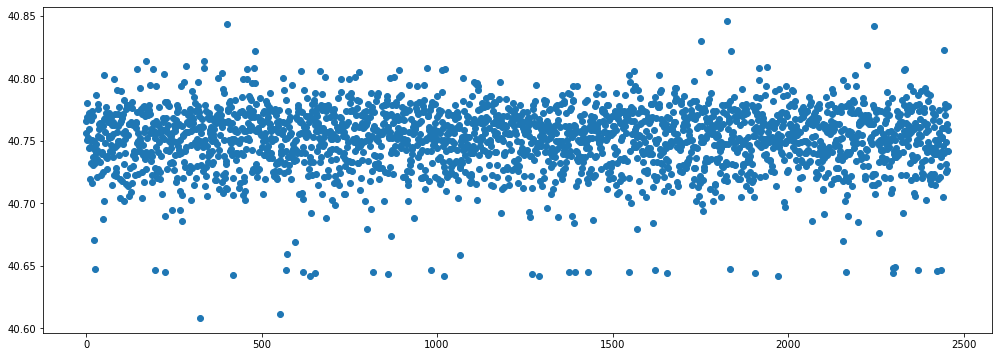

In [68]:
fig = plt.figure(figsize=(17,6))
plt.scatter(range(len(sample)), sample['pickup_latitude'])
plt.show()  ## 위도 0도 = 적도 / 위도 < 0 = 남반구

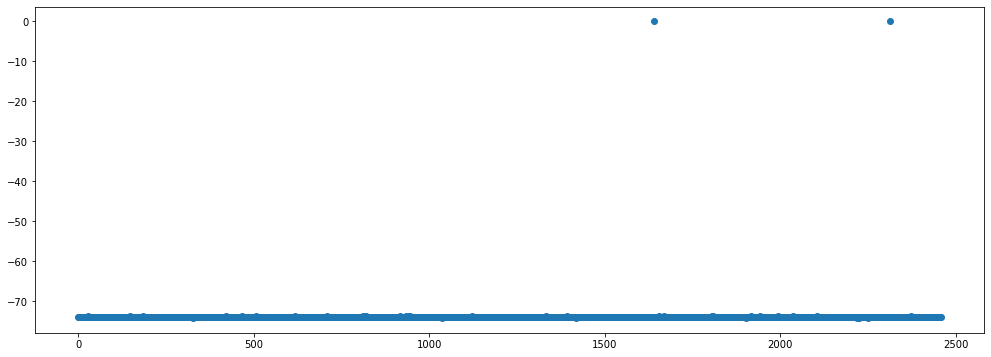

In [69]:
fig = plt.figure(figsize=(17,6))
plt.scatter(range(len(sample)), sample['dropoff_longitude'])
plt.show()

In [70]:
sample = sample[sample.dropoff_longitude < 0]

sample.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,11.206698,-73.975818,40.751155,-73.975071,40.751215,1.696254
std,9.043818,0.033610,0.026114,0.033783,0.030567,1.308504
min,2.500000,-74.185047,40.608384,-74.192142,40.595073,1.000000
25%,6.000000,-73.992477,40.737590,-73.991792,40.735098,1.000000
50%,8.500000,-73.982320,40.753636,-73.980730,40.753124,1.000000
75%,12.900000,-73.968226,40.768322,-73.965083,40.767916,2.000000
max,80.750000,-73.776587,40.845333,-73.755112,40.959270,6.000000


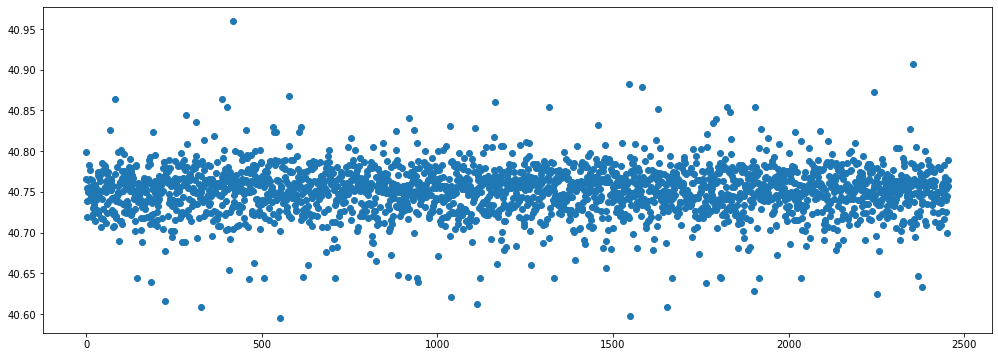

In [71]:
fig = plt.figure(figsize=(17,6))
plt.scatter(range(len(sample)), sample['dropoff_latitude'])
plt.show()

In [ ]:
fig = plt.figure(figsize=(17,6))
plt.scatter(range(len(sample)), sample['dropoff_latitude'])
plt.show()

In [72]:
sample.passenger_count.value_counts()

1    1692
2     380
5     184
3     106
6      50
4      44
Name: passenger_count, dtype: int64

In [74]:
len(sample)

2456

* scatter matrix 그려서 전체 분포 확인 ; 뭔지 잘 모르겠다...

In [75]:
_ = sample.drop(['key'], axis=1)
_.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16050459,11.0,2012-10-19 01:54:10 UTC,-73.983146,40.766148,-73.961360,40.799494,1
22320028,7.3,2009-12-30 15:50:00 UTC,-73.981530,40.756375,-73.981328,40.766150,2
6595422,13.5,2014-08-17 23:47:00 UTC,-73.994620,40.750580,-73.996580,40.719030,2
25918844,24.5,2014-06-05 08:19:00 UTC,-73.947117,40.779792,-74.008148,40.738370,1
29049635,12.1,2009-05-21 13:13:16 UTC,-73.963286,40.769127,-73.987943,40.754910,1


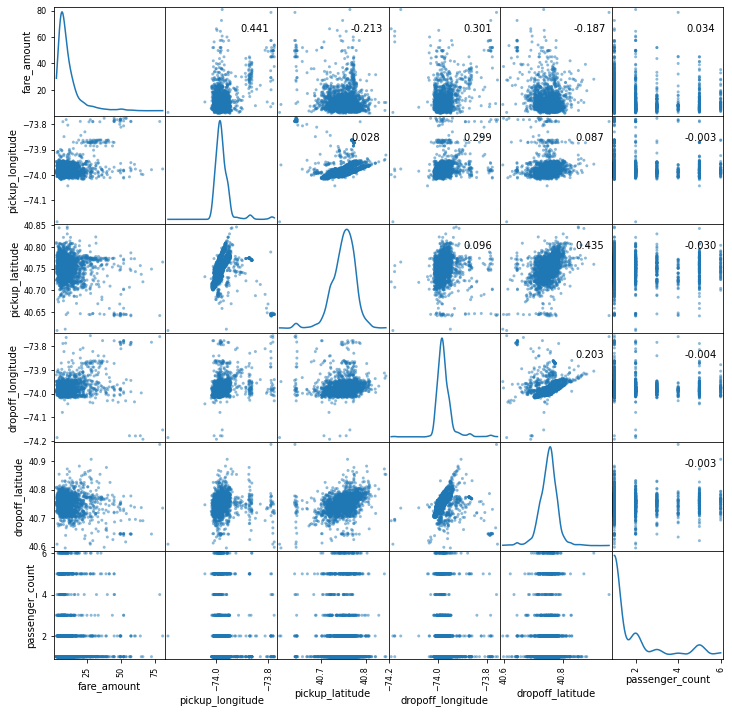

In [76]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(_, alpha=0.5, figsize=(12, 12), diagonal='kde')
corr = _.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

* heatmap 그려서 변수들간의 상관관계 살펴보기 ; passenger_count는 확실히 상관 X

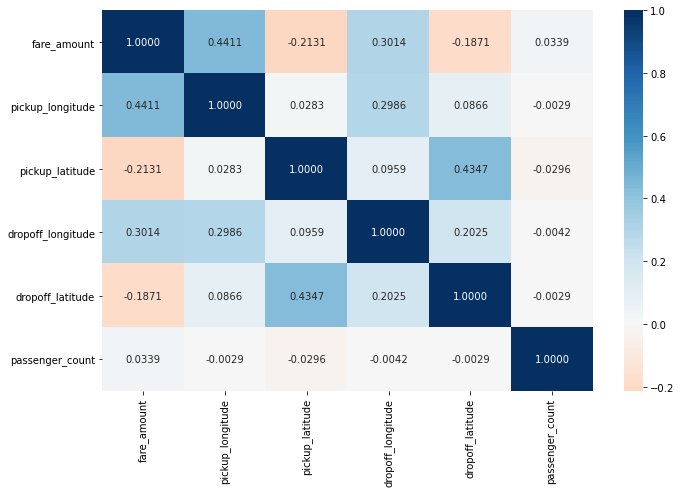

In [77]:
import seaborn as sns

corr = sample.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".4f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [1]:
! pip install geopy

In [2]:
from geopy.distance import distance

In [ ]:
pickup=sample[['pickup_longitude','pickup_latitude']]
pd.DataFrame(pickup)
pickup.head()

In [ ]:
dropoff=sample[['dropoff_longitude','dropoff_latitude']]
dropoff=pd.DataFrame(dropoff)
dropoff.head()

In [ ]:
dist=[]
for i in range(len(dropoff.index)): 
 result = distance(pickup.values[i], dropoff.values[i]).m
 dist.append(result)